# Working with TensorFlow Data

In [1]:
import tensorflow as tf

#display tf version and test if GPU is active

tf.__version__,tf.test.gpu_device_name()

('2.6.0', '/device:GPU:0')

# Available TFDS

In [2]:
#displaying a list of available TFDS

import tensorflow_datasets as tfds

#Showing available datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [3]:
# # of how many datasets

print(str(len(tfds.list_builders())) + " datasets")

224 datasets


# Load a TFDS

In [4]:
# load train set

train, info = tfds.load("mnist",split="train",with_info=True)
info

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [5]:
# Load test data

test, info = tfds.load("mnist",split="test",with_info=True)
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

# Extract Useful Infomation

In [6]:
# create a variable to hold a return symbol
br = "\n"


In [7]:
#display number of classes

num_classes = info.features["label"].num_classes
class_labels = info.features["label"].names

In [8]:
#display class labels

print("number of classes:",num_classes)
print("class labels:",class_labels)

number of classes: 10
class labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Inspect the TFDS

In [9]:
#Displaying the training and test set

print(train)
print(test)

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [10]:
#display with element_spec method

print(train.element_spec)
print(test.element_spec)

{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}
{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}


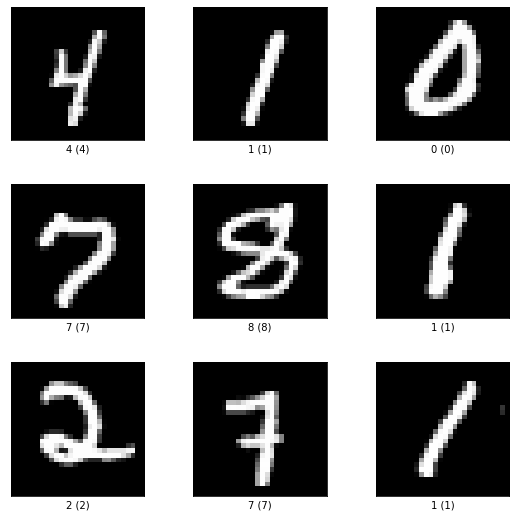

In [11]:
# Show train feature image examples

fig = tfds.show_examples(train,info)

# Feature Dictionaries

In [12]:
# Take one sample from the train dataset and display its keys

for sample in train.take(1):
  print(list(sample.keys()))

['image', 'label']


In [13]:
# displaying the feature shape and target value from the first train sample

for sample in train.take(1):
  print("feature shape: ",sample["image"].shape)
  print("target value: ",sample["label"].numpy())

feature shape:  (28, 28, 1)
target value:  4


In [14]:
#obtaining nine examples from the train set

n,ls = 9, []

for sample in train.take(n):
  ls.append(sample["label"].numpy())

ls

[4, 1, 0, 7, 8, 1, 2, 7, 1]

In [15]:
# Using the as_supervised = True parameter with tfds.load we get a tuple of (feature,label) instead of a dictionary

ds = tfds.load("mnist",split="train",as_supervised=True)
ds = ds.take(1)

In [16]:
for image,label in ds:
  print(image.shape,br,label) 

(28, 28, 1) 
 tf.Tensor(4, shape=(), dtype=int64)


In [17]:
#Getting a numpy tuple of (feature,label)
ds = tfds.load("mnist",split="train",as_supervised=True)
ds = ds.take(1)

In [18]:
for image, label in tfds.as_numpy(ds):
  print(type(image),type(label),label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 4


In [19]:
#Getting a batched tf.Tensor

image,label = tfds.as_numpy(tfds.load("mnist",split="train",batch_size=-1,as_supervised=True))

type(image),image.shape

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


(numpy.ndarray, (60000, 28, 28, 1))

# Build the input pipeline

In [20]:
#Scale, shuffle, batch and prefetch train data

train_sc = train.map(lambda items: (tf.cast(items["image"],tf.float32)/255.,items["label"]))
train_ds = train_sc.shuffle(10000).batch(32).prefetch(1)

In [21]:
#Scale, batch and prefetch test data

test_sc = test.map(lambda items:(tf.cast(items["image"],tf.float32)/255.,items["label"]))
test_ds = test_sc.batch(32).prefetch(1)

In [22]:
#Inspecting the tensors

train_ds,test_ds

(<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>)

# Build the Model

In [23]:
#import libs

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [24]:
# Create the model

# clear previous model

tf.keras.backend.clear_session()

In [25]:
model = Sequential([Flatten(input_shape=[28,28,1]),Dense(512,activation="relu"),Dense(10,activation="softmax")])

# Model Summary

In [26]:
# Display a summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Complie and Train the Model

In [27]:
# Compile the model with optimizer, loss and metrics parameters

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [28]:
#Train the model

epochs = 3
history = model.fit(train_ds, epochs=epochs,verbose=1,validation_data=test_ds)

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2046 - accuracy: 0.9394 - val_loss: 0.0977 - val_accuracy: 0.9698
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0799 - accuracy: 0.9759 - val_loss: 0.0828 - val_accuracy: 0.9742
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0735 - val_accuracy: 0.9761


# Generalize on test data

In [29]:
model.evaluate(test_ds)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9761


[0.07347331941127777, 0.9761000275611877]

# Visualize Performance

In [30]:
# Get training record into a variable

history_dict = history.history
import matplotlib.pyplot as plt


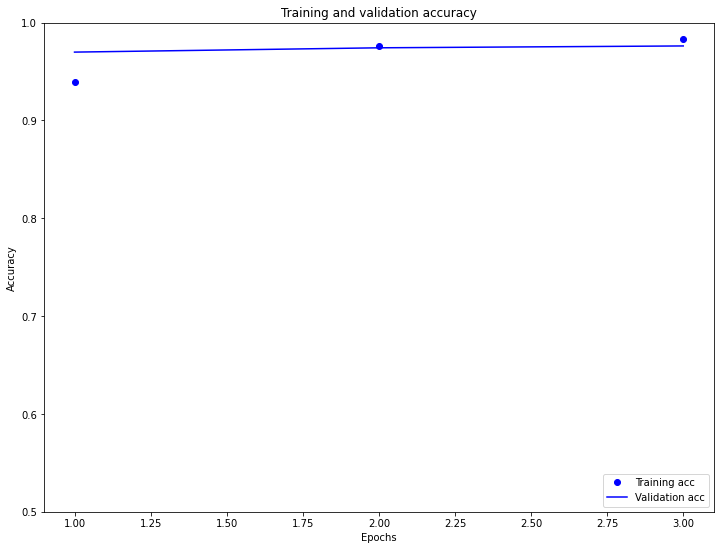

In [31]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1,len(acc)+1)

plt.figure(figsize=(12,9))
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim((0.5,1))
plt.show()

In [32]:
# clear previous figure

plt.clf()

<Figure size 432x288 with 0 Axes>

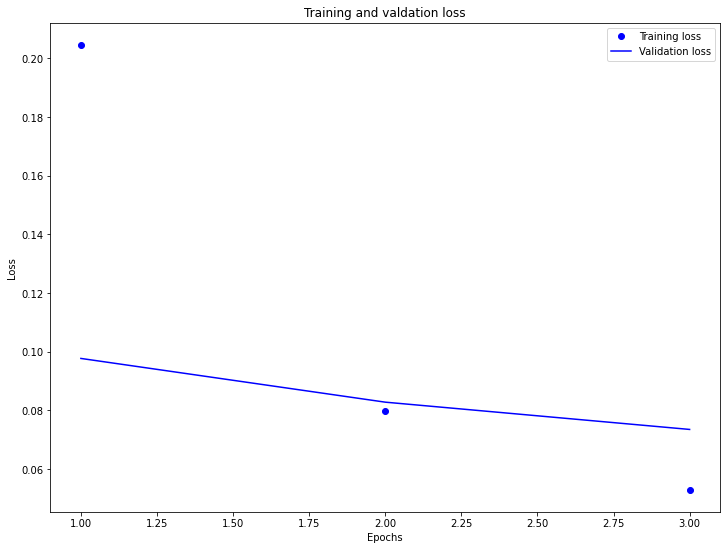

In [33]:
plt.figure(figsize=(12,9))
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and valdation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# DatasetBuilder (tfds.builder)

In [34]:
# showing how to load minst with tfds.builder

mnist_builder = tfds.builder("mnist")
mnist_info = mnist_builder.info
mnist_builder.download_and_prepare()
datasets = mnist_builder.as_dataset()

In [35]:
# Build the train and test sets

mnist_train, mnist_test = datasets["train"],datasets["test"]

In [36]:
#Use the feature dicitionary to get critical info

for sample in mnist_train.take(1):
  print("feature shape: ",sample["image"].shape)
  print("target value: ",sample["label"].numpy())

feature shape:  (28, 28, 1)
target value:  4


# Mnist Metadata

In [37]:
#accessing the metadata about mnist

mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [38]:
#Accessing feature info

mnist_info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [39]:
#display number of classes

num_classes = mnist_info.features["label"].num_classes
class_labels = mnist_info.features["label"].names

#display class labels

print("number of classes:",num_classes)
print("class labels:",class_labels)

number of classes: 10
class labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [40]:
# Access shapes and datatypes

print(mnist_info.features.shape)
print(mnist_info.features.dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}


In [41]:
# Access image info
print(mnist_info.features["image"].shape)
print(mnist_info.features["image"].dtype)

(28, 28, 1)
<dtype: 'uint8'>


In [42]:
# Access label info

print(mnist_info.features["label"].shape)
print(mnist_info.features["label"].dtype)

()
<dtype: 'int64'>


In [43]:
#Train and test splits

print(mnist_info.splits)

{'test': <tfds.core.SplitInfo num_examples=10000>, 'train': <tfds.core.SplitInfo num_examples=60000>}


In [44]:
# Available split keys
print(list(mnist_info.splits.keys())) 

['test', 'train']


In [45]:
# Number of train and test example

print(mnist_info.splits["train"].num_examples)
print(mnist_info.splits["test"].num_examples)

60000
10000


# Show Examples

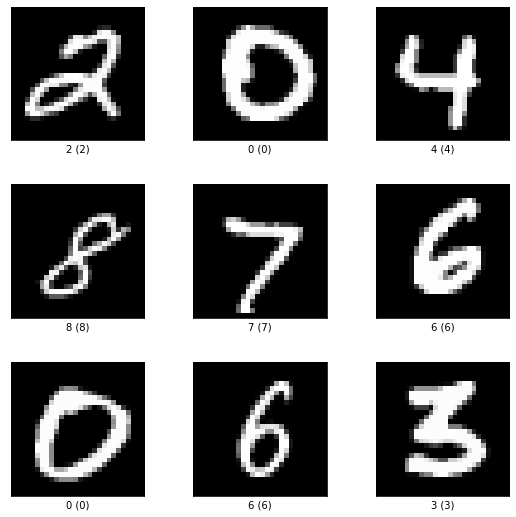

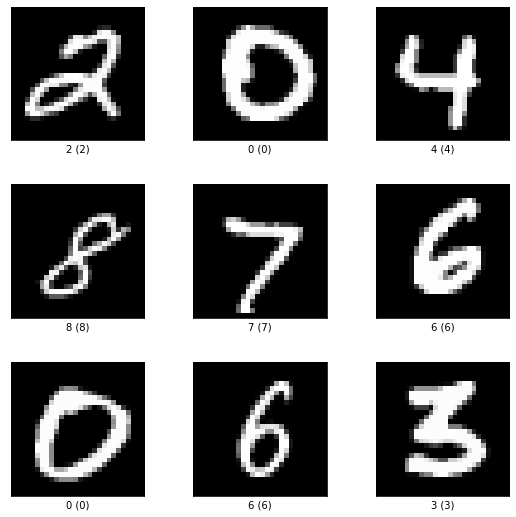

In [46]:
#Showing exmaples from the test set

fig = tfds.show_examples(mnist_test,info)
fig

# Prepare DatasetBuilder Data

In [47]:
# Prepare the input pipeline for datasetbuilder train and test data

#Scale, shuffle, batch, and prefetch train data

train_sc = mnist_train.map(lambda items: (tf.cast(items["image"],tf.float32)/255.,items["label"]))
train_build = train_sc.shuffle(1024).batch(128).prefetch(1)

In [48]:
# Scale, batch and prefetch test data:

test_sc = mnist_test.map(lambda items:(tf.cast(items["image"],tf.float32)/255.,items["label"]))
test_build = test_sc.batch(128).prefetch(1)

In [49]:
#inspect tensors

train_build,test_build

(<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>)

# Build the Model

In [50]:
# Create the model

tf.keras.backend.clear_session()

In [51]:
model = Sequential([Flatten(input_shape=[28,28,1]),Dense(512,activation="relu"),Dense(10,activation="softmax")])

# Compile the model

In [52]:
#compile 

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Train the Model

In [53]:
# train

model.fit(train_build,epochs=3,validation_data=test_build)

Epoch 1/3
469/469 [==============================] - 7s 14ms/step - loss: 0.2693 - accuracy: 0.9234 - val_loss: 0.1374 - val_accuracy: 0.9602
Epoch 2/3
469/469 [==============================] - 3s 6ms/step - loss: 0.1085 - accuracy: 0.9685 - val_loss: 0.0917 - val_accuracy: 0.9739
Epoch 3/3
469/469 [==============================] - 3s 6ms/step - loss: 0.0713 - accuracy: 0.9791 - val_loss: 0.0772 - val_accuracy: 0.9757


# Generalize on Test Data

In [54]:
# Evaluate based on test data

model.evaluate(test_build)

79/79 [==============================] - 0s 5ms/step - loss: 0.0772 - accuracy: 0.9757


[0.07720445096492767, 0.9757000207901001]

# Load CIFAR-10

In [55]:
# Loading and processes the dataset for Tensorflow consumption

cifar10_builder = tfds.builder("cifar10")
cifar10_info = cifar10_builder.info
cifar10_builder.download_and_prepare()
cifar10_train = cifar10_builder.as_dataset(split="train")
cifar10_test = cifar10_builder.as_dataset(split="test")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteQT5J7S/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteQT5J7S/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [56]:
# Inspect the train set

cifar10_train

<PrefetchDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>

# Inspect the dataset

In [57]:
#Getting info about the dataset

cifar10_info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [58]:
#Access feature info

cifar10_info.features

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [59]:
#Get class names

cifar10_info.features["label"].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [60]:
# Get available split keys

print(list(cifar10_info.splits.keys()))

['test', 'train']


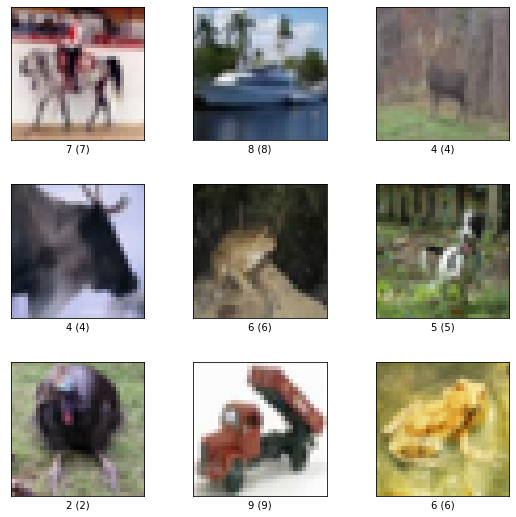

In [61]:
# Show train examples

fig = tfds.show_examples(cifar10_train,info)

In [62]:
# Use the feature dictionary to display train labels

[sample["label"].numpy() for sample in cifar10_train.take(9)]

[7, 8, 4, 4, 6, 5, 2, 9, 6]

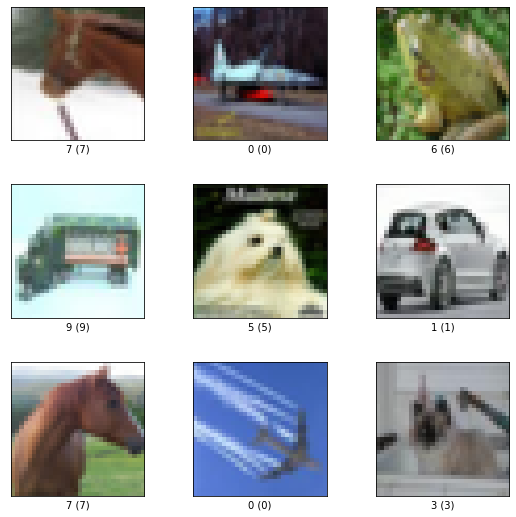

In [63]:
#Showing test examples

fig = tfds.show_examples(cifar10_test,info)

# Prepare the Input Pipeline

In [64]:
#Scale shuffle, batch and prefetch train data

train_sc = cifar10_train.map(lambda items:(tf.cast(items["image"],tf.float32)/255.,items["label"]))

In [65]:
train_cd = train_sc.shuffle(1024).batch(128).prefetch(1)

In [66]:
# Scale, batch and prefetch test data

test_sc = cifar10_test.map(lambda items: (tf.cast(items["image"],tf.float32)/255.,items["label"]))

In [67]:
test_cd = test_sc.batch(128).prefetch(1)

In [68]:
# inspect the tensors

train_cd,test_cd

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>)

# Model the data

In [69]:
# Create the model

tf.keras.backend.clear_session()

In [70]:
model = Sequential([Flatten(input_shape = [32,32,3]),Dense(512,activation="relu"),Dense(10,activation="softmax")])

In [71]:
# Inspect the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Complie the model

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [73]:
# Train the model

epochs = 3

history = model.fit(train_cd,epochs=epochs,verbose=1,validation_data=test_cd)

Epoch 1/3
391/391 [==============================] - 9s 22ms/step - loss: 1.9853 - accuracy: 0.3159 - val_loss: 1.7879 - val_accuracy: 0.3603
Epoch 2/3
391/391 [==============================] - 3s 8ms/step - loss: 1.7339 - accuracy: 0.3827 - val_loss: 1.7048 - val_accuracy: 0.3978
Epoch 3/3
391/391 [==============================] - 3s 8ms/step - loss: 1.6602 - accuracy: 0.4148 - val_loss: 1.6486 - val_accuracy: 0.4170
